In [ ]:
import pandas as pd
#url = 'https://raw.githubusercontent.com/stesstesste/SICSS_2024/main/test_day/example_data_probabilities_new.csv'
url = 'https://raw.githubusercontent.com/stesstesste/SICSS_2024/main/data_probabilities/2023_data_probabilities.csv'
df = pd.read_csv(url)
url2 = 'https://raw.githubusercontent.com/stesstesste/SICSS_2024/main/data_probabilities/2022_data_probabilities.csv'
df2 = pd.read_csv(url2)

In [ ]:
df=pd.concat([df2,df])

In [ ]:
import ast

df['probabilities'] = df['probabilities'].apply(ast.literal_eval)

# Creating the 'topic_primary' column
df['topic_primary'] = df['probabilities'].apply(lambda x: max(x, key=x.get))
df['topic_primary']

0                      305 - Political Authority
1       501 - Environmental Protection: Positive
2       501 - Environmental Protection: Positive
3       501 - Environmental Protection: Positive
4                  504 - Welfare State Expansion
                          ...                   
2945                   305 - Political Authority
2946                             202 - Democracy
2947           204 - Constitutionalism: Negative
2948           203 - Constitutionalism: Positive
2949    501 - Environmental Protection: Positive
Name: topic_primary, Length: 6827, dtype: object

In [ ]:
import re
df['topic_primary'] = df['topic_primary'].apply(lambda x: re.sub(r'^\d+\s*-\s*', '', x))
df['topic_primary']
df['topic_primary_alt'] = df['topic_primary'].apply(lambda x: re.sub(r': (Negative|Positive)', '', x))

unique_observations = df['topic_primary_alt'].unique()

#print(unique_observations)
df = df[(df['topic_primary_alt'] != 'Political Authority')&(df['Party_orientation'] != '-')& (df["Speaker_party"]!="MNOÖ")]
df['Speaker_party'] = df['Speaker_party'].str.replace(r'-frakció', '', regex=True)

df.loc[df['Speaker_party'].str.contains(r'KDNP', case=False, na=False), 'Party_orientation'] = 'Right to far-right'
df.loc[df['Speaker_party'].str.contains(r'KNDP', case=False, na=False), 'Party_orientation'] = 'Right to far-right'
df.loc[df['Speaker_party'].str.contains(r'LMP', case=False, na=False), 'Party_orientation'] = 'Green / left'
df.loc[df['Speaker_party'].str.contains(r'Párbeszéd', case=False, na=False), 'Party_orientation'] = 'Green / left'

#new_df['Party_family'] = NaN

0            Political Authority
1            Political Authority
2            Political Authority
3            Political Authority
4        Welfare State Expansion
                  ...           
2945         Political Authority
2946                   Democracy
2947           Constitutionalism
2948           Constitutionalism
2949    Environmental Protection
Name: topic_primary_alt, Length: 2950, dtype: object

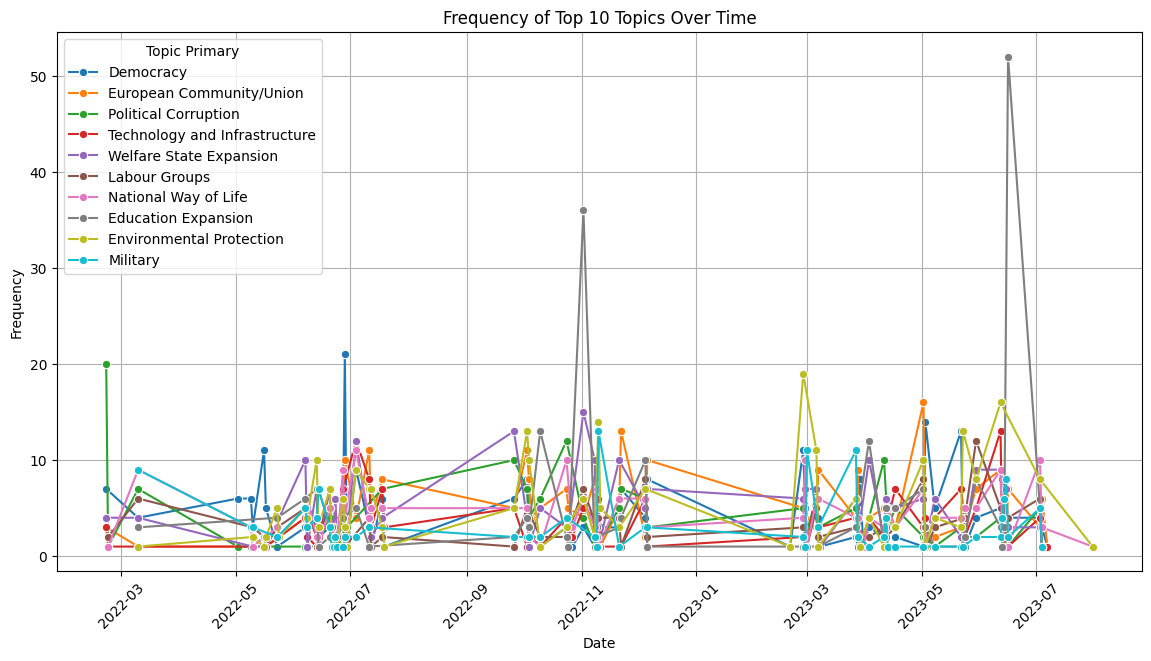

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data creation (for demonstration purposes)
# df = pd.read_csv('your_file.csv')  # Load your dataframe here

# Step 1: Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df = df[df['topic_primary_alt'] != 'Political Authority']
# Step 2: Calculate the total frequency of each topic
topic_counts = df['topic_primary_alt'].value_counts().nlargest(10)
top_topics = topic_counts.index

# Step 3: Filter the dataframe to include only the top 10 topics
filtered_df = df[df['topic_primary_alt'].isin(top_topics)]

# Step 4: Group by 'Date' and 'topic_primary' to count occurrences
grouped_df = filtered_df.groupby(['Date', 'topic_primary_alt']).size().reset_index(name='frequency')

# Step 5: Plotting
plt.figure(figsize=(14, 7))
sns.lineplot(data=grouped_df, x='Date', y='frequency', hue='topic_primary_alt', marker='o')

# Customize the plot
plt.title('Frequency of Top 10 Topics Over Time')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.legend(title='Topic Primary')
plt.grid(True)
plt.xticks(rotation=45)

# Show the plot
plt.show()


In [ ]:

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
def get_polarity(text):
    return analyzer.polarity_scores(text)['compound']

ModuleNotFoundError: No module named 'vaderSentiment'

In [ ]:
pip install vaderSentiment


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 1.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import concurrent.futures

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Sample data creation (for demonstration purposes)
# df = pd.read_csv('your_file.csv')  # Load your dataframe here

# Define the function to get polarity score
def get_polarity(text):
    return analyzer.polarity_scores(text)['compound']

# Define the function to process a chunk of the DataFrame
def process_chunk(chunk):
    chunk['polarity'] = chunk['text'].apply(get_polarity)
    return chunk

# Split DataFrame into chunks
def chunkify(df, n):
    return [df[i::n] for i in range(n)]

# Number of chunks (e.g., number of parallel threads)
num_chunks = 8  # Adjust this based on your system's capabilities
chunks = chunkify(filtered_df, num_chunks)

# Process chunks in parallel
with concurrent.futures.ThreadPoolExecutor() as executor:
    results = list(executor.map(process_chunk, chunks))

# Combine results back into a single DataFrame
df_new = pd.concat(results)

# Display the first few rows of the DataFrame to verify the new column


<ipython-input-30-abdc01872ea5>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['polarity'] = chunk['text'].apply(get_polarity)
<ipython-input-30-abdc01872ea5>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['polarity'] = chunk['text'].apply(get_polarity)
<ipython-input-30-abdc01872ea5>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

In [ ]:
df_new = df_new[df_new['topic_primary_alt'] != 'Political Authority']

In [ ]:
import pandas as pd

# Sample data creation (for demonstration purposes)
# df_new = pd.read_csv('your_file.csv')  # Load your dataframe here

# Check if 'speaker_gender' and 'polarity' columns exist
if 'Speaker_gender' in df_new.columns and 'polarity' in df_new.columns:
    # Group by 'speaker_gender' and calculate the mean polarity for each gender
    average_polarities = df_new.groupby('Speaker_gender')['polarity'].mean().reset_index()

    # Rename the columns for clarity
    average_polarities.columns = ['Speaker_gender', 'average_polarity']

    # Display the result
    print(average_polarities)
else:
    print("The 'speaker_gender' or 'polarity' column is not present in the dataframe.")


  Speaker_gender  average_polarity
0              F          0.656349
1              M          0.589668


<ipython-input-45-5761714ee519>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Party_orientation', y='average_polarity', data=average_polarities_by_orientation, palette='viridis', order=party_order)


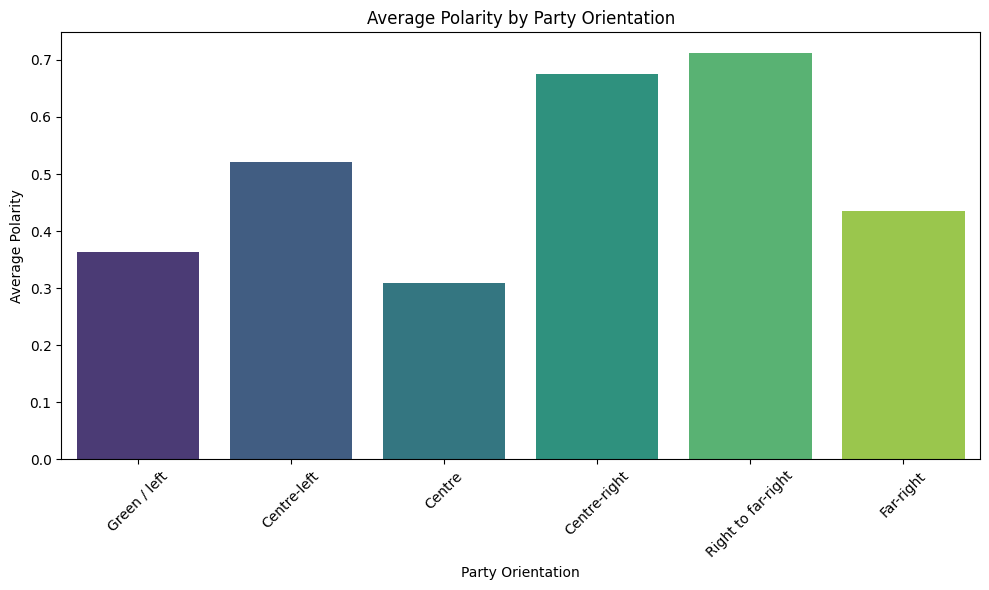

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you already have the DataFrame df_new with polarity scores

# Desired order of the categories
party_order = ['Green / left', 'Centre-left', 'Centre', 'Centre-right', 'Right to far-right', 'Far-right']

# Ensure 'Party_orientation' is a categorical type with the specified order
df_new['Party_orientation'] = pd.Categorical(df_new['Party_orientation'], categories=party_order, ordered=True)

# Ensure the necessary columns exist
if 'Party_orientation' in df_new.columns and 'polarity' in df_new.columns and 'topic_primary_alt' in df_new.columns:
    # Step 1: Filter out rows where 'topic_primary_alt' is 'Political Authority' or 'Party_orientation' is NaN
    filtered_df = df_new[(df_new['topic_primary_alt'] != 'Political Authority') & (~df_new['Party_orientation'].isna())]

    # Step 2: Group by 'Party_orientation' and calculate the mean polarity for each orientation
    average_polarities_by_orientation = filtered_df.groupby('Party_orientation')['polarity'].mean().reset_index()

    # Step 3: Rename the columns for clarity
    average_polarities_by_orientation.columns = ['Party_orientation', 'average_polarity']

    # Step 4: Plotting
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Party_orientation', y='average_polarity', data=average_polarities_by_orientation, palette='viridis', order=party_order)
    plt.title('Average Polarity by Party Orientation')
    plt.xlabel('Party Orientation')
    plt.ylabel('Average Polarity')
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Show plot
    plt.show()
else:
    print("The 'Party_orientation', 'polarity', or 'topic_primary_alt' column is not present in the dataframe.")


<ipython-input-44-86fe5b1c76cd>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Party_orientation', y='average_polarity', data=average_polarities_by_orientation, palette='viridis', order=party_order)


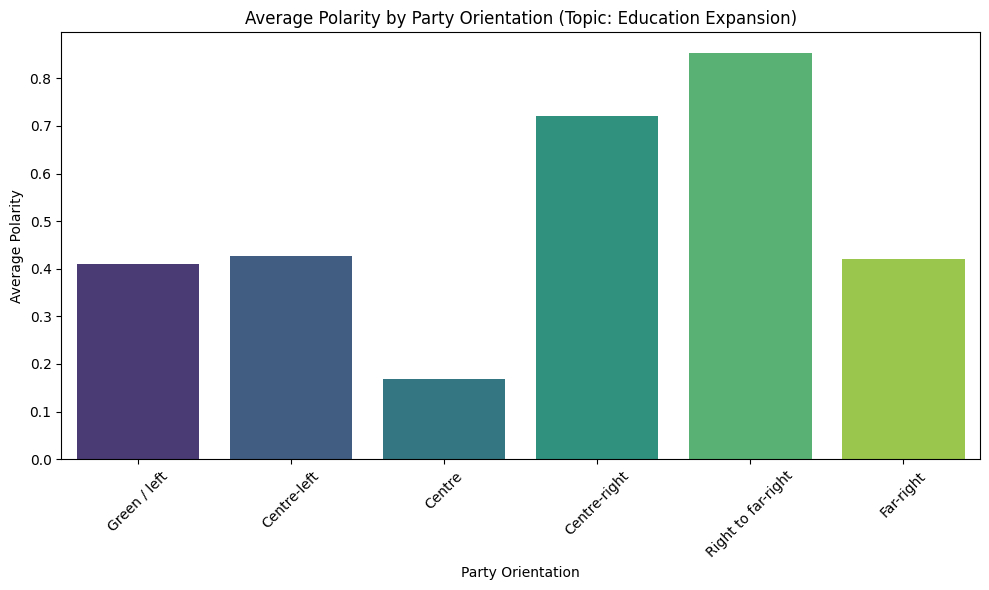

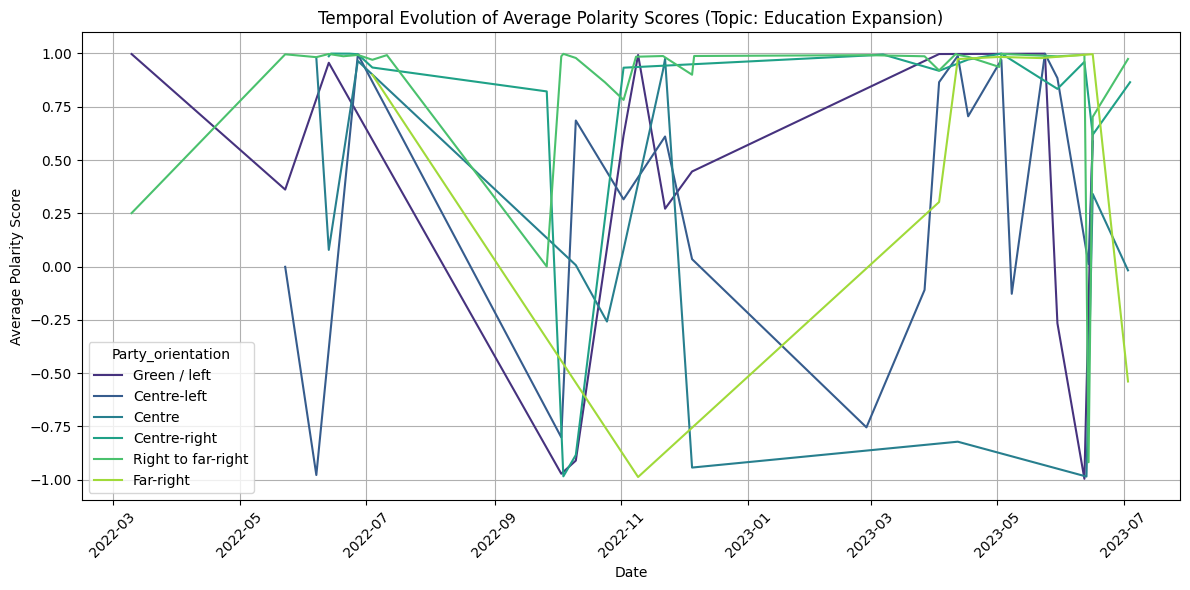

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you already have the DataFrame df_new with polarity scores

# Desired order of the categories
party_order = ['Green / left', 'Centre-left', 'Centre', 'Centre-right', 'Right to far-right', 'Far-right']

# Ensure 'Party_orientation' is a categorical type with the specified order
df_new['Party_orientation'] = pd.Categorical(df_new['Party_orientation'], categories=party_order, ordered=True)

# Sample data creation (for demonstration purposes)
# df_new = pd.read_csv('your_file.csv')  # Load your dataframe here

# Ensure the necessary columns exist
if 'Party_orientation' in df_new.columns and 'polarity' in df_new.columns and 'topic_primary_alt' in df_new.columns:
    # Step 1: Filter rows where 'topic_primary_alt' is 'Military' and 'Party_orientation' is not NaN
    filtered_df = df_new[(df_new['topic_primary_alt'] == 'Education Expansion') & (~df_new['Party_orientation'].isna())]

    # Step 2: Group by 'Party_orientation' and calculate the mean polarity for each orientation
    average_polarities_by_orientation = filtered_df.groupby('Party_orientation')['polarity'].mean().reset_index()

    # Step 3: Rename the columns for clarity
    average_polarities_by_orientation.columns = ['Party_orientation', 'average_polarity']

    # Step 4: Plotting
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Party_orientation', y='average_polarity', data=average_polarities_by_orientation, palette='viridis', order=party_order)
    plt.title('Average Polarity by Party Orientation (Topic: Education Expansion)')
    plt.xlabel('Party Orientation')
    plt.ylabel('Average Polarity')
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Show plot
    plt.show()
else:
    print("The 'Party_orientation', 'polarity', or 'topic_primary_alt' column is not present in the dataframe.")

# Assuming you already have the DataFrame df_new with polarity scores

# Filter rows where topic_primary_alt is 'Military'
df_education_expansion = df_new[df_new['topic_primary_alt'] == 'Education Expansion']

# Group by 'Date' and 'Party_orientation' and calculate mean polarity for each group
mean_polarity_by_orientation = df_education_expansion.groupby(['Date', 'Party_orientation'])['polarity'].mean().reset_index()

# Filter out entries with short 'Party_orientation' names if necessary
mean_polarity_by_orientation_filtered = mean_polarity_by_orientation[mean_polarity_by_orientation['Party_orientation'].str.len() >= 2]

# Ensure 'Party_orientation' is a categorical type with the specified order
mean_polarity_by_orientation_filtered['Party_orientation'] = pd.Categorical(mean_polarity_by_orientation_filtered['Party_orientation'], categories=party_order, ordered=True)

# Plotting the temporal evolution of average polarity scores for different political orientations
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='polarity', hue='Party_orientation', data=mean_polarity_by_orientation_filtered, palette='viridis', hue_order=party_order)
plt.title('Temporal Evolution of Average Polarity Scores (Topic: Education Expansion)')
plt.xlabel('Date')
plt.ylabel('Average Polarity Score')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()


<ipython-input-49-bf070604ee19>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Party_orientation', y='average_polarity', data=average_polarities_by_orientation, palette='viridis', order=filtered_parties)


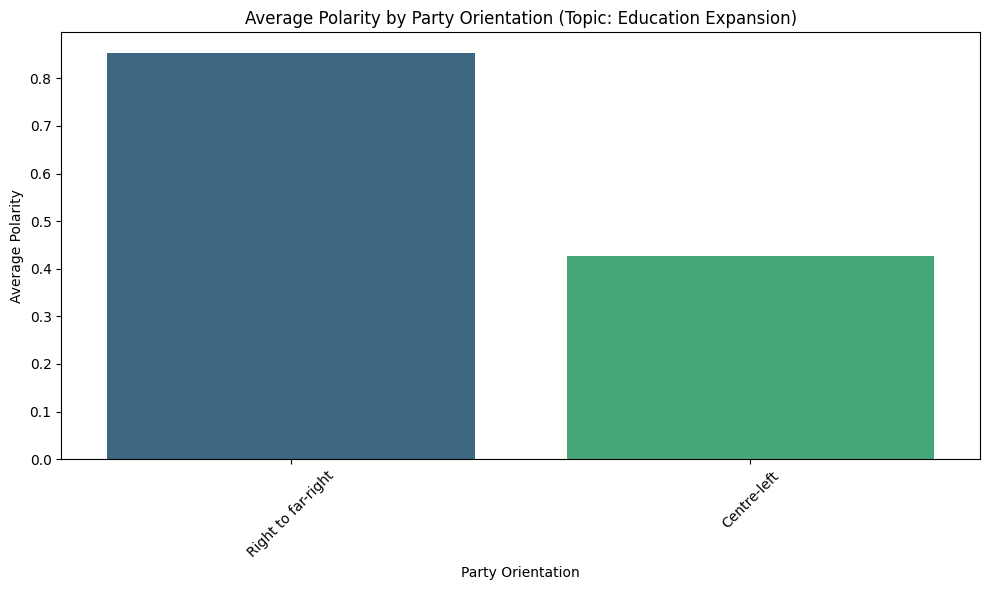

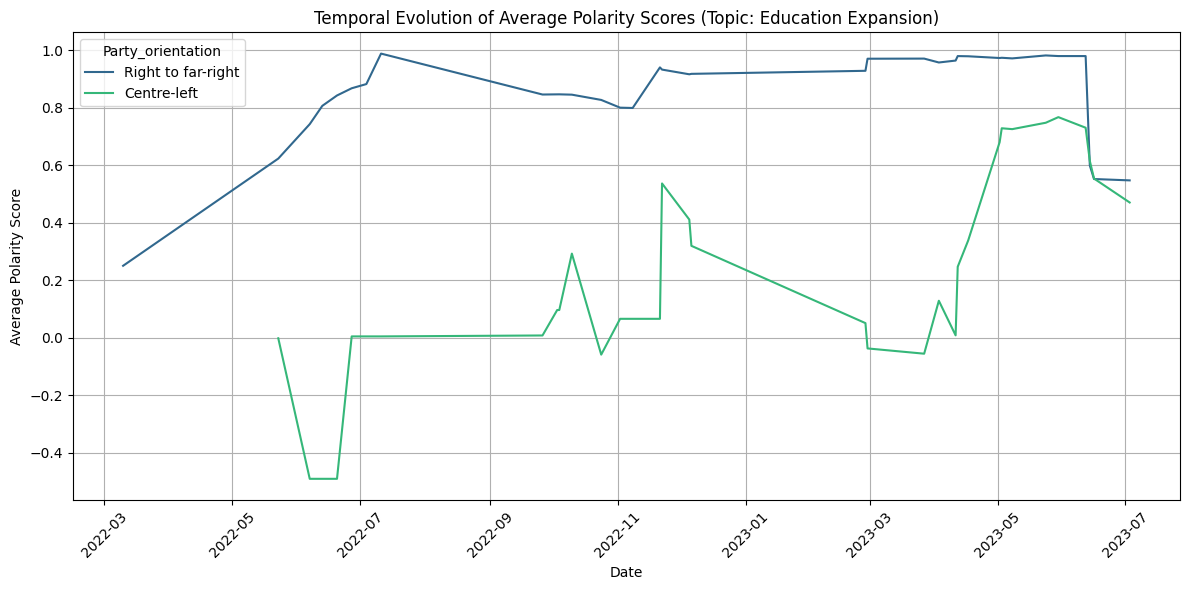

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you already have the DataFrame df_new with polarity scores

# Desired order of the categories
party_order = ['Green / left', 'Centre-left', 'Centre', 'Centre-right', 'Right to far-right', 'Far-right']

# Ensure 'Party_orientation' is a categorical type with the specified order
df_new['Party_orientation'] = pd.Categorical(df_new['Party_orientation'], categories=party_order, ordered=True)

# Sample data creation (for demonstration purposes)
# df_new = pd.read_csv('your_file.csv')  # Load your dataframe here

# Filter for specific party orientations
filtered_parties = ['Right to far-right', 'Centre-left']

# Ensure the necessary columns exist
if 'Party_orientation' in df_new.columns and 'polarity' in df_new.columns and 'topic_primary_alt' in df_new.columns:
    # Step 1: Filter rows where 'topic_primary_alt' is 'Education Expansion', 'Party_orientation' is not NaN, and 'Party_orientation' is in filtered_parties
    filtered_df = df_new[(df_new['topic_primary_alt'] == 'Education Expansion') &
                         (~df_new['Party_orientation'].isna()) &
                         (df_new['Party_orientation'].isin(filtered_parties))]

    # Step 2: Group by 'Party_orientation' and calculate the mean polarity for each orientation
    average_polarities_by_orientation = filtered_df.groupby('Party_orientation')['polarity'].mean().reset_index()

    # Step 3: Rename the columns for clarity
    average_polarities_by_orientation.columns = ['Party_orientation', 'average_polarity']

    # Step 4: Plotting
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Party_orientation', y='average_polarity', data=average_polarities_by_orientation, palette='viridis', order=filtered_parties)
    plt.title('Average Polarity by Party Orientation (Topic: Education Expansion)')
    plt.xlabel('Party Orientation')
    plt.ylabel('Average Polarity')
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Show plot
    plt.show()
else:
    print("The 'Party_orientation', 'polarity', or 'topic_primary_alt' column is not present in the dataframe.")

# Assuming you already have the DataFrame df_new with polarity scores

# Filter rows where topic_primary_alt is 'Education Expansion'
df_education_expansion = df_new[df_new['topic_primary_alt'] == 'Education Expansion']

# Filter for specific party orientations
df_education_expansion = df_education_expansion[df_education_expansion['Party_orientation'].isin(filtered_parties)]

# Group by 'Date' and 'Party_orientation' and calculate mean polarity for each group
mean_polarity_by_orientation = df_education_expansion.groupby(['Date', 'Party_orientation'])['polarity'].mean().reset_index()

# Filter out entries with short 'Party_orientation' names if necessary
mean_polarity_by_orientation_filtered = mean_polarity_by_orientation[mean_polarity_by_orientation['Party_orientation'].str.len() >= 2]

# Ensure 'Party_orientation' is a categorical type with the specified order
mean_polarity_by_orientation_filtered['Party_orientation'] = pd.Categorical(mean_polarity_by_orientation_filtered['Party_orientation'], categories=filtered_parties, ordered=True)

# Applying a rolling mean for smoothing
mean_polarity_by_orientation_filtered['smoothed_polarity'] = mean_polarity_by_orientation_filtered.groupby('Party_orientation')['polarity'].transform(lambda x: x.rolling(window=7, min_periods=1).mean())

# Plotting the temporal evolution of average polarity scores for different political orientations
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='smoothed_polarity', hue='Party_orientation', data=mean_polarity_by_orientation_filtered, palette='viridis', hue_order=filtered_parties)
plt.title('Temporal Evolution of Average Polarity Scores (Topic: Education Expansion)')
plt.xlabel('Date')
plt.ylabel('Average Polarity Score')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()


<ipython-input-61-9942fdb03a2f>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Party_orientation', y='average_polarity', data=average_polarities_by_orientation, palette='viridis', order=filtered_parties)


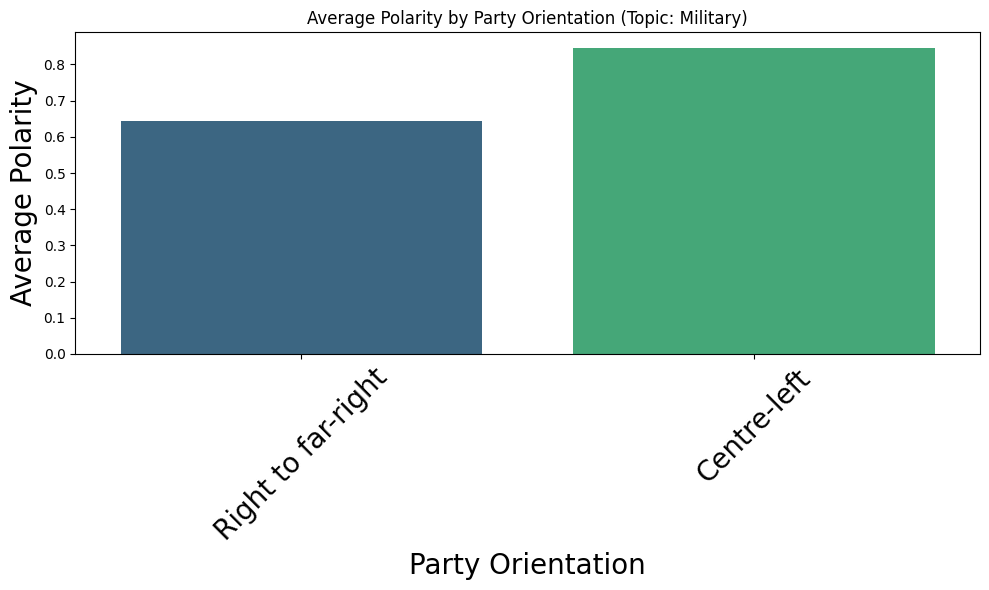

<Figure size 640x480 with 0 Axes>

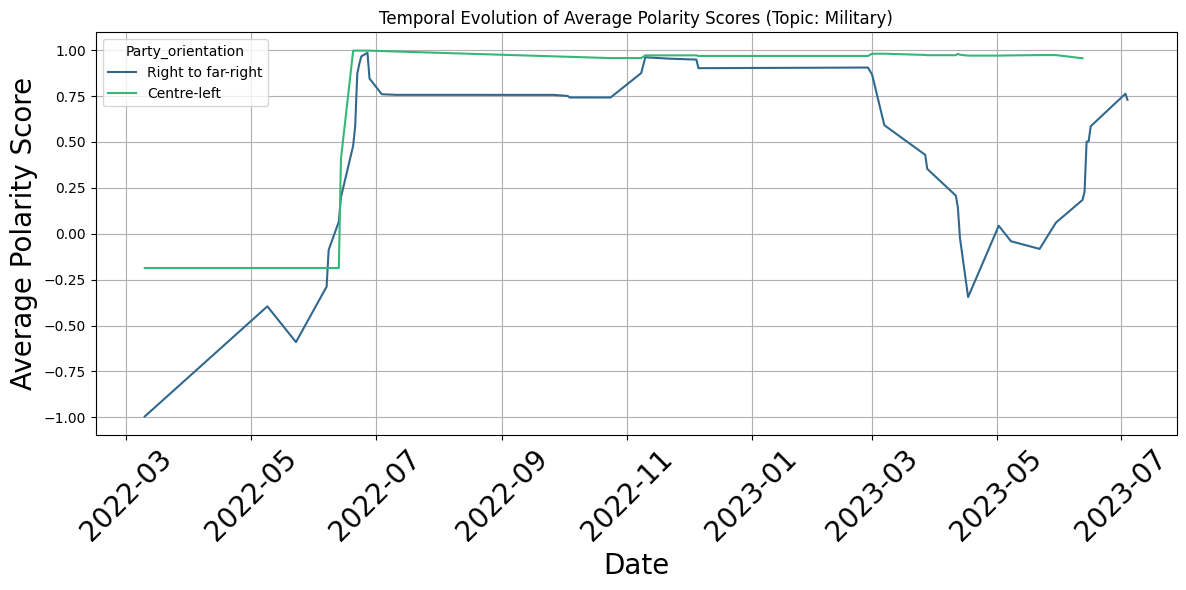

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you already have the DataFrame df_new with polarity scores

# Desired order of the categories
party_order = ['Green / left', 'Centre-left', 'Centre', 'Centre-right', 'Right to far-right', 'Far-right']

# Ensure 'Party_orientation' is a categorical type with the specified order
df_new['Party_orientation'] = pd.Categorical(df_new['Party_orientation'], categories=party_order, ordered=True)

# Sample data creation (for demonstration purposes)
# df_new = pd.read_csv('your_file.csv')  # Load your dataframe here

# Filter for specific party orientations
filtered_parties = ['Right to far-right', 'Centre-left']

# Ensure the necessary columns exist
if 'Party_orientation' in df_new.columns and 'polarity' in df_new.columns and 'topic_primary_alt' in df_new.columns:
    # Step 1: Filter rows where 'topic_primary_alt' is 'Education Expansion', 'Party_orientation' is not NaN, and 'Party_orientation' is in filtered_parties
    filtered_df = df_new[(df_new['topic_primary_alt'] == 'Military') &
                         (~df_new['Party_orientation'].isna()) &
                         (df_new['Party_orientation'].isin(filtered_parties))]

    # Step 2: Group by 'Party_orientation' and calculate the mean polarity for each orientation
    average_polarities_by_orientation = filtered_df.groupby('Party_orientation')['polarity'].mean().reset_index()

    # Step 3: Rename the columns for clarity
    average_polarities_by_orientation.columns = ['Party_orientation', 'average_polarity']

    # Step 4: Plotting
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Party_orientation', y='average_polarity', data=average_polarities_by_orientation, palette='viridis', order=filtered_parties)
    plt.title('Average Polarity by Party Orientation (Topic: Military)')
    plt.xlabel('Party Orientation',fontsize=20)
    plt.ylabel('Average Polarity',fontsize=20)
    plt.xticks(rotation=45,fontsize=20)
    plt.tight_layout()

    # Show plot
    plt.show()
    plt.savefig('military1.png')
else:
    print("The 'Party_orientation', 'polarity', or 'topic_primary_alt' column is not present in the dataframe.")

# Assuming you already have the DataFrame df_new with polarity scores

# Filter rows where topic_primary_alt is 'Education Expansion'
df_education_expansion = df_new[df_new['topic_primary_alt'] == 'Military']

# Filter for specific party orientations
df_education_expansion = df_education_expansion[df_education_expansion['Party_orientation'].isin(filtered_parties)]

# Group by 'Date' and 'Party_orientation' and calculate mean polarity for each group
mean_polarity_by_orientation = df_education_expansion.groupby(['Date', 'Party_orientation'])['polarity'].mean().reset_index()

# Filter out entries with short 'Party_orientation' names if necessary
mean_polarity_by_orientation_filtered = mean_polarity_by_orientation[mean_polarity_by_orientation['Party_orientation'].str.len() >= 2]

# Ensure 'Party_orientation' is a categorical type with the specified order
mean_polarity_by_orientation_filtered['Party_orientation'] = pd.Categorical(mean_polarity_by_orientation_filtered['Party_orientation'], categories=filtered_parties, ordered=True)

# Applying a rolling mean for smoothing
mean_polarity_by_orientation_filtered['smoothed_polarity'] = mean_polarity_by_orientation_filtered.groupby('Party_orientation')['polarity'].transform(lambda x: x.rolling(window=7, min_periods=1).mean())

# Plotting the temporal evolution of average polarity scores for different political orientations
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='smoothed_polarity', hue='Party_orientation', data=mean_polarity_by_orientation_filtered, palette='viridis', hue_order=filtered_parties)
plt.title('Temporal Evolution of Average Polarity Scores (Topic: Military)')
plt.xlabel('Date',fontsize=20)
plt.ylabel('Average Polarity Score',fontsize=20)
plt.grid(True)
plt.xticks(rotation=45,fontsize=20)
plt.tight_layout()
plt.savefig('military2.png')

# Display the plot
plt.show()


<ipython-input-60-e5cabdaed02f>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Party_orientation', y='average_polarity', data=average_polarities_by_orientation, palette='viridis', order=filtered_parties)


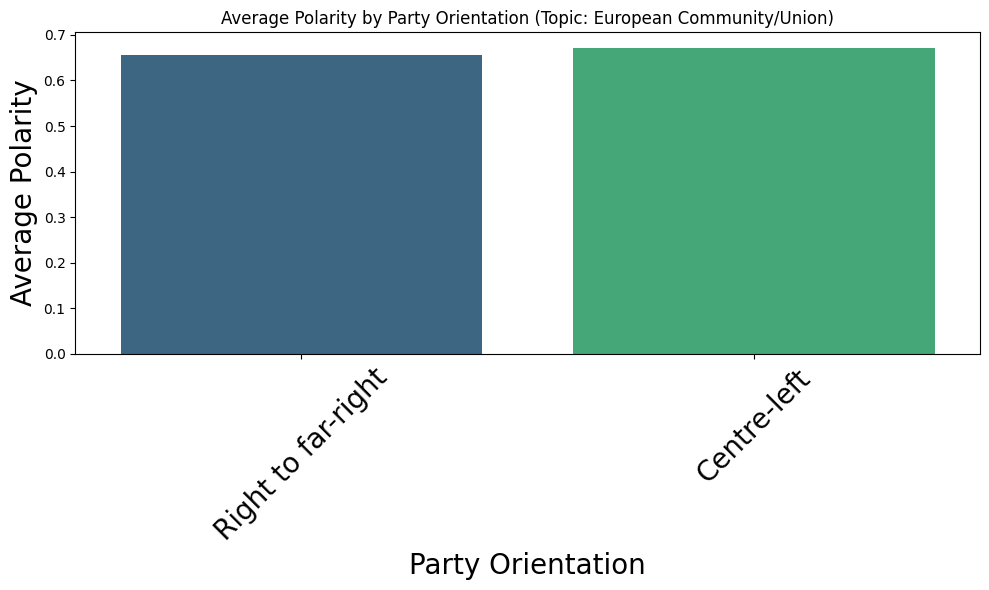

<Figure size 640x480 with 0 Axes>

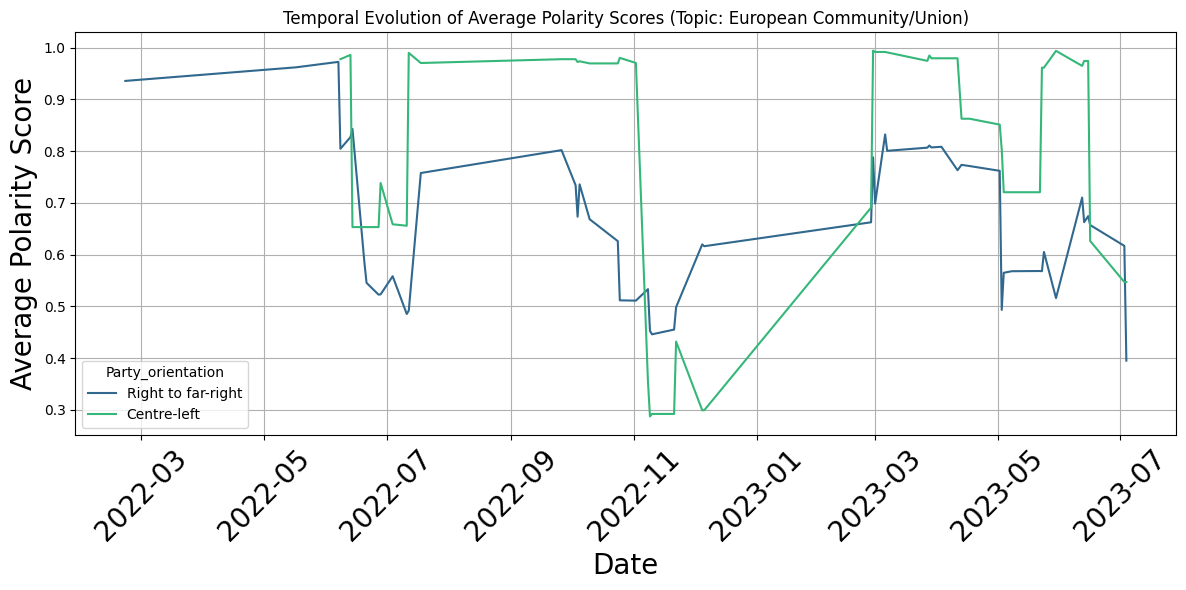

<Figure size 640x480 with 0 Axes>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you already have the DataFrame df_new with polarity scores

# Desired order of the categories
party_order = ['Green / left', 'Centre-left', 'Centre', 'Centre-right', 'Right to far-right', 'Far-right']

# Ensure 'Party_orientation' is a categorical type with the specified order
df_new['Party_orientation'] = pd.Categorical(df_new['Party_orientation'], categories=party_order, ordered=True)

# Sample data creation (for demonstration purposes)
# df_new = pd.read_csv('your_file.csv')  # Load your dataframe here

# Filter for specific party orientations
filtered_parties = ['Right to far-right', 'Centre-left']

# Ensure the necessary columns exist
if 'Party_orientation' in df_new.columns and 'polarity' in df_new.columns and 'topic_primary_alt' in df_new.columns:
    # Step 1: Filter rows where 'topic_primary_alt' is 'Education Expansion', 'Party_orientation' is not NaN, and 'Party_orientation' is in filtered_parties
    filtered_df = df_new[(df_new['topic_primary_alt'] == 'European Community/Union') &
                         (~df_new['Party_orientation'].isna()) &
                         (df_new['Party_orientation'].isin(filtered_parties))]

    # Step 2: Group by 'Party_orientation' and calculate the mean polarity for each orientation
    average_polarities_by_orientation = filtered_df.groupby('Party_orientation')['polarity'].mean().reset_index()

    # Step 3: Rename the columns for clarity
    average_polarities_by_orientation.columns = ['Party_orientation', 'average_polarity']

    # Step 4: Plotting
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Party_orientation', y='average_polarity', data=average_polarities_by_orientation, palette='viridis', order=filtered_parties)
    plt.title('Average Polarity by Party Orientation (Topic: European Community/Union)')
    plt.xlabel('Party Orientation',fontsize=20)
    plt.ylabel('Average Polarity',fontsize=20)
    plt.xticks(rotation=45,fontsize=20)
    plt.tight_layout()

    # Show plot
    plt.show()
    plt.savefig('EU1.png')
else:
    print("The 'Party_orientation', 'polarity', or 'topic_primary_alt' column is not present in the dataframe.")

# Assuming you already have the DataFrame df_new with polarity scores

# Filter rows where topic_primary_alt is 'Education Expansion'
df_education_expansion = df_new[df_new['topic_primary_alt'] == 'European Community/Union']

# Filter for specific party orientations
df_education_expansion = df_education_expansion[df_education_expansion['Party_orientation'].isin(filtered_parties)]

# Group by 'Date' and 'Party_orientation' and calculate mean polarity for each group
mean_polarity_by_orientation = df_education_expansion.groupby(['Date', 'Party_orientation'])['polarity'].mean().reset_index()

# Filter out entries with short 'Party_orientation' names if necessary
mean_polarity_by_orientation_filtered = mean_polarity_by_orientation[mean_polarity_by_orientation['Party_orientation'].str.len() >= 2]

# Ensure 'Party_orientation' is a categorical type with the specified order
mean_polarity_by_orientation_filtered['Party_orientation'] = pd.Categorical(mean_polarity_by_orientation_filtered['Party_orientation'], categories=filtered_parties, ordered=True)

# Applying a rolling mean for smoothing
mean_polarity_by_orientation_filtered['smoothed_polarity'] = mean_polarity_by_orientation_filtered.groupby('Party_orientation')['polarity'].transform(lambda x: x.rolling(window=7, min_periods=1).mean())

# Plotting the temporal evolution of average polarity scores for different political orientations
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='smoothed_polarity', hue='Party_orientation', data=mean_polarity_by_orientation_filtered, palette='viridis', hue_order=filtered_parties)
plt.title('Temporal Evolution of Average Polarity Scores (Topic: European Community/Union)')
plt.xlabel('Date',fontsize=20)
plt.ylabel('Average Polarity Score',fontsize=20)
plt.grid(True)
plt.xticks(rotation=45,fontsize=20)
plt.tight_layout()

# Display the plot
plt.show()
plt.savefig('EU2.png')


<ipython-input-59-87bacfdc8de0>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Party_orientation', y='average_polarity', data=average_polarities_by_orientation, palette='viridis', order=filtered_parties)


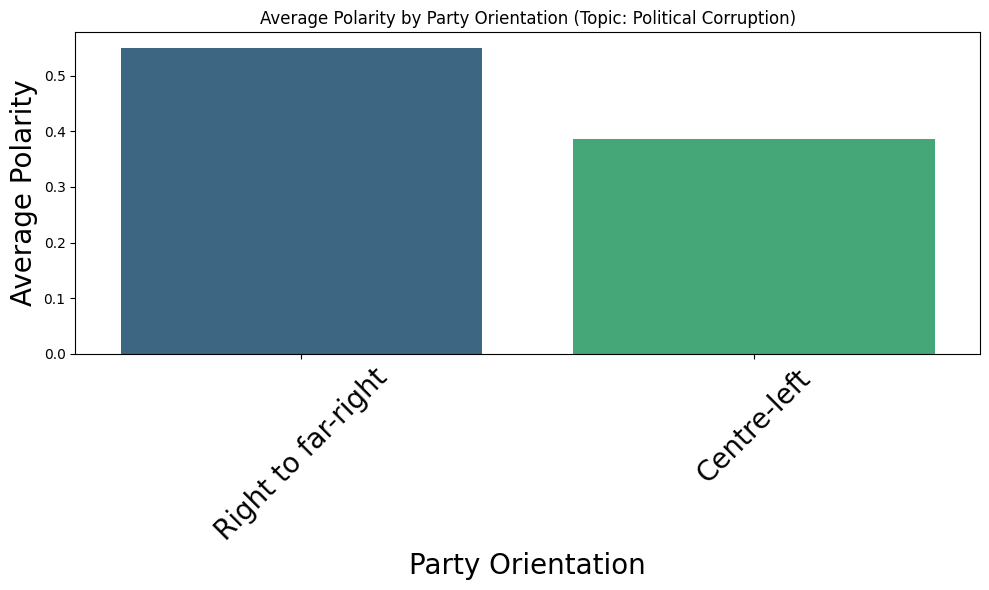

<Figure size 640x480 with 0 Axes>

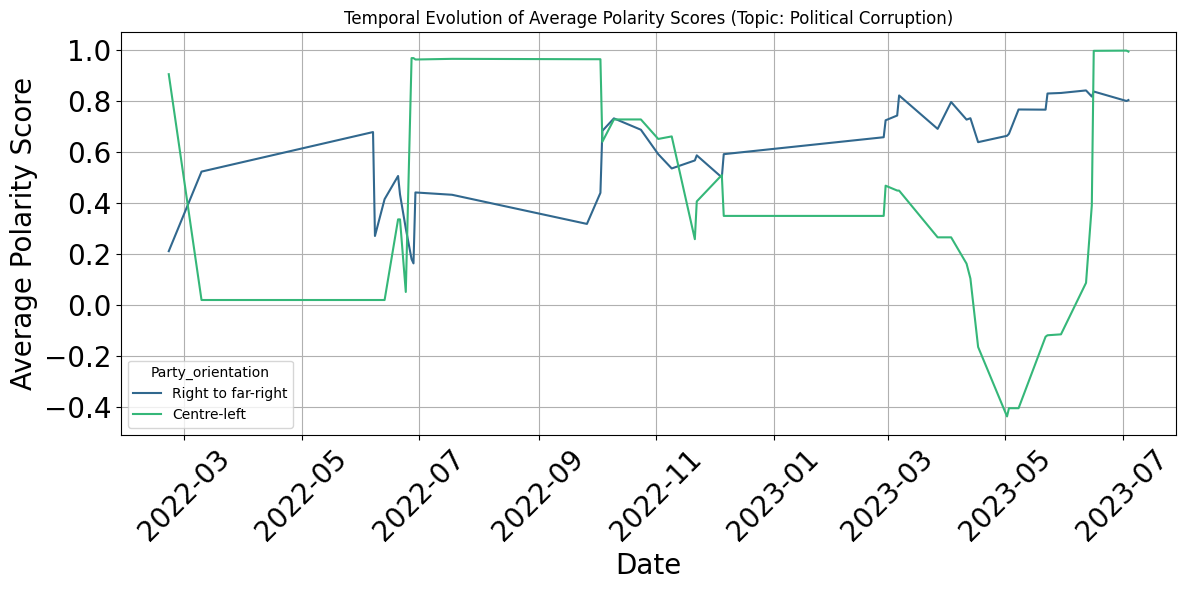

<Figure size 640x480 with 0 Axes>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you already have the DataFrame df_new with polarity scores

# Desired order of the categories
party_order = ['Green / left', 'Centre-left', 'Centre', 'Centre-right', 'Right to far-right', 'Far-right']

# Ensure 'Party_orientation' is a categorical type with the specified order
df_new['Party_orientation'] = pd.Categorical(df_new['Party_orientation'], categories=party_order, ordered=True)

# Sample data creation (for demonstration purposes)
# df_new = pd.read_csv('your_file.csv')  # Load your dataframe here

# Filter for specific party orientations
filtered_parties = ['Right to far-right', 'Centre-left']

# Ensure the necessary columns exist
if 'Party_orientation' in df_new.columns and 'polarity' in df_new.columns and 'topic_primary_alt' in df_new.columns:
    # Step 1: Filter rows where 'topic_primary_alt' is 'Education Expansion', 'Party_orientation' is not NaN, and 'Party_orientation' is in filtered_parties
    filtered_df = df_new[(df_new['topic_primary_alt'] == 'Political Corruption') &
                         (~df_new['Party_orientation'].isna()) &
                         (df_new['Party_orientation'].isin(filtered_parties))]

    # Step 2: Group by 'Party_orientation' and calculate the mean polarity for each orientation
    average_polarities_by_orientation = filtered_df.groupby('Party_orientation')['polarity'].mean().reset_index()

    # Step 3: Rename the columns for clarity
    average_polarities_by_orientation.columns = ['Party_orientation', 'average_polarity']

    # Step 4: Plotting
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Party_orientation', y='average_polarity', data=average_polarities_by_orientation, palette='viridis', order=filtered_parties)
    plt.title('Average Polarity by Party Orientation (Topic: Political Corruption)')
    plt.xlabel('Party Orientation',fontsize=20)
    plt.ylabel('Average Polarity',fontsize=20)
    plt.xticks(rotation=45,fontsize=20)
    plt.tight_layout()

    # Show plot
    plt.show()

    plt.savefig('political_corr1.png')
else:
    print("The 'Party_orientation', 'polarity', or 'topic_primary_alt' column is not present in the dataframe.")

# Assuming you already have the DataFrame df_new with polarity scores

# Filter rows where topic_primary_alt is 'Education Expansion'
df_education_expansion = df_new[df_new['topic_primary_alt'] == 'Political Corruption']

# Filter for specific party orientations
df_education_expansion = df_education_expansion[df_education_expansion['Party_orientation'].isin(filtered_parties)]

# Group by 'Date' and 'Party_orientation' and calculate mean polarity for each group
mean_polarity_by_orientation = df_education_expansion.groupby(['Date', 'Party_orientation'])['polarity'].mean().reset_index()

# Filter out entries with short 'Party_orientation' names if necessary
mean_polarity_by_orientation_filtered = mean_polarity_by_orientation[mean_polarity_by_orientation['Party_orientation'].str.len() >= 2]

# Ensure 'Party_orientation' is a categorical type with the specified order
mean_polarity_by_orientation_filtered['Party_orientation'] = pd.Categorical(mean_polarity_by_orientation_filtered['Party_orientation'], categories=filtered_parties, ordered=True)

# Applying a rolling mean for smoothing
mean_polarity_by_orientation_filtered['smoothed_polarity'] = mean_polarity_by_orientation_filtered.groupby('Party_orientation')['polarity'].transform(lambda x: x.rolling(window=7, min_periods=1).mean())

# Plotting the temporal evolution of average polarity scores for different political orientations
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='smoothed_polarity', hue='Party_orientation', data=mean_polarity_by_orientation_filtered, palette='viridis', hue_order=filtered_parties)
plt.title('Temporal Evolution of Average Polarity Scores (Topic: Political Corruption)')
plt.xlabel('Date')
plt.ylabel('Average Polarity Score')
plt.grid(True)
plt.xticks(rotation=45)

plt.xlabel('Date', fontsize=20)
plt.ylabel('Average Polarity Score', fontsize=20)
plt.xticks(rotation=45, fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()

# Display the plot
plt.show()
plt.savefig('political_corr2.png')


<ipython-input-42-fdca1413f39d>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Party_orientation', y='average_polarity', data=average_polarities_by_orientation, palette='viridis', order=party_order)


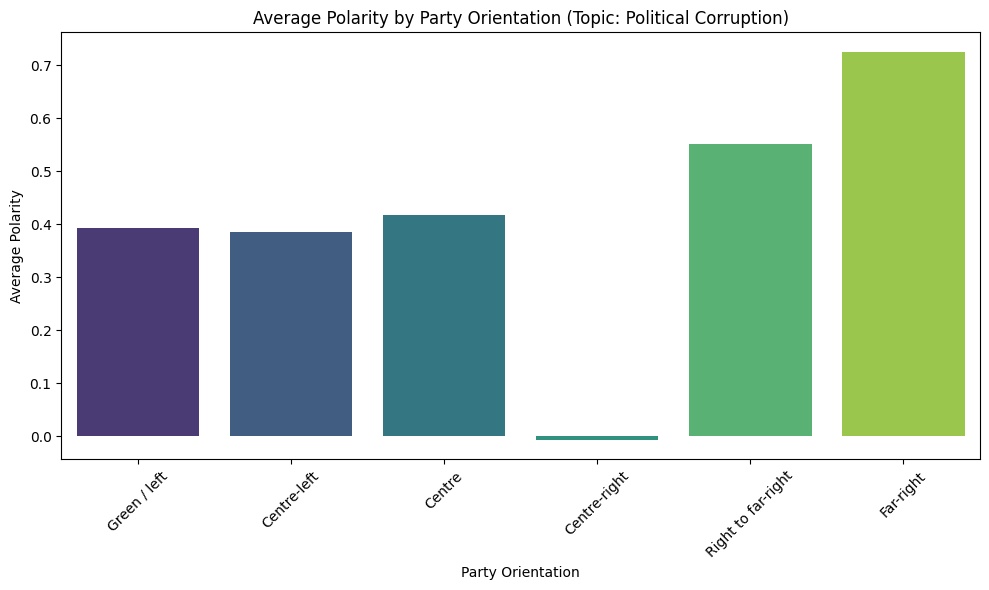

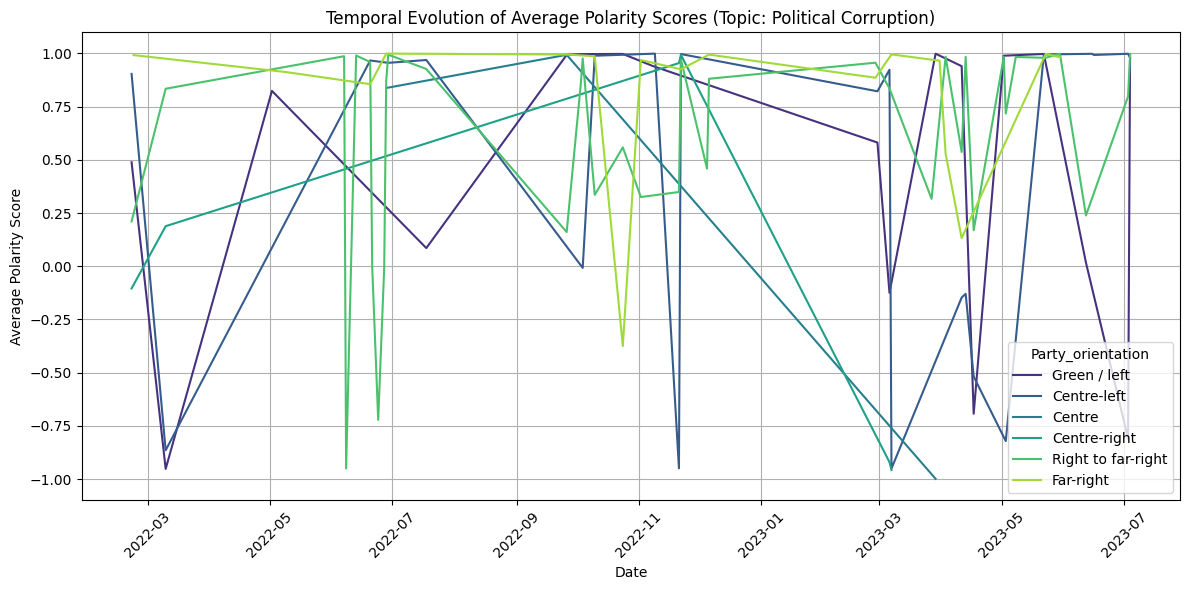

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you already have the DataFrame df_new with polarity scores

# Desired order of the categories
party_order = ['Green / left', 'Centre-left', 'Centre', 'Centre-right', 'Right to far-right', 'Far-right']

# Ensure 'Party_orientation' is a categorical type with the specified order
df_new['Party_orientation'] = pd.Categorical(df_new['Party_orientation'], categories=party_order, ordered=True)

# Sample data creation (for demonstration purposes)
# df_new = pd.read_csv('your_file.csv')  # Load your dataframe here

# Ensure the necessary columns exist
if 'Party_orientation' in df_new.columns and 'polarity' in df_new.columns and 'topic_primary_alt' in df_new.columns:
    # Step 1: Filter rows where 'topic_primary_alt' is 'Military' and 'Party_orientation' is not NaN
    filtered_df = df_new[(df_new['topic_primary_alt'] == 'Political Corruption') & (~df_new['Party_orientation'].isna())]

    # Step 2: Group by 'Party_orientation' and calculate the mean polarity for each orientation
    average_polarities_by_orientation = filtered_df.groupby('Party_orientation')['polarity'].mean().reset_index()

    # Step 3: Rename the columns for clarity
    average_polarities_by_orientation.columns = ['Party_orientation', 'average_polarity']

    # Step 4: Plotting
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Party_orientation', y='average_polarity', data=average_polarities_by_orientation, palette='viridis', order=party_order)
    plt.title('Average Polarity by Party Orientation (Topic: Political Corruption)')
    plt.xlabel('Party Orientation')
    plt.ylabel('Average Polarity')
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Show plot
    plt.show()
else:
    print("The 'Party_orientation', 'polarity', or 'topic_primary_alt' column is not present in the dataframe.")

# Assuming you already have the DataFrame df_new with polarity scores

# Filter rows where topic_primary_alt is 'Military'
df_education_expansion = df_new[df_new['topic_primary_alt'] == 'Political Corruption']

# Group by 'Date' and 'Party_orientation' and calculate mean polarity for each group
mean_polarity_by_orientation = df_education_expansion.groupby(['Date', 'Party_orientation'])['polarity'].mean().reset_index()

# Filter out entries with short 'Party_orientation' names if necessary
mean_polarity_by_orientation_filtered = mean_polarity_by_orientation[mean_polarity_by_orientation['Party_orientation'].str.len() >= 2]

# Ensure 'Party_orientation' is a categorical type with the specified order
mean_polarity_by_orientation_filtered['Party_orientation'] = pd.Categorical(mean_polarity_by_orientation_filtered['Party_orientation'], categories=party_order, ordered=True)

# Plotting the temporal evolution of average polarity scores for different political orientations
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='polarity', hue='Party_orientation', data=mean_polarity_by_orientation_filtered, palette='viridis', hue_order=party_order)
plt.title('Temporal Evolution of Average Polarity Scores (Topic: Political Corruption)')
plt.xlabel('Date')
plt.ylabel('Average Polarity Score')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()


<ipython-input-41-56d97ad60509>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Party_orientation', y='average_polarity', data=average_polarities_by_orientation, palette='viridis', order=party_order)


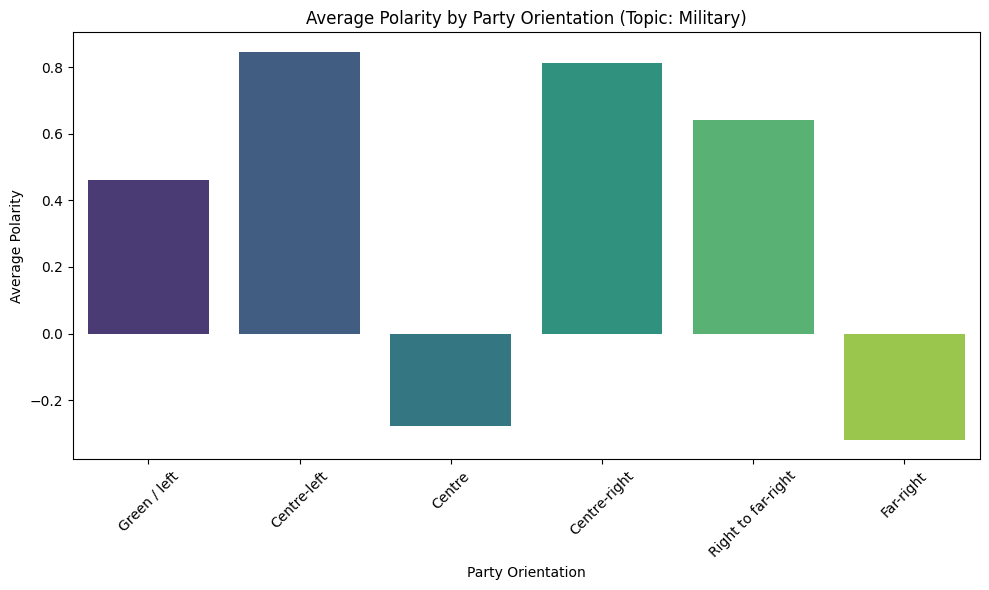

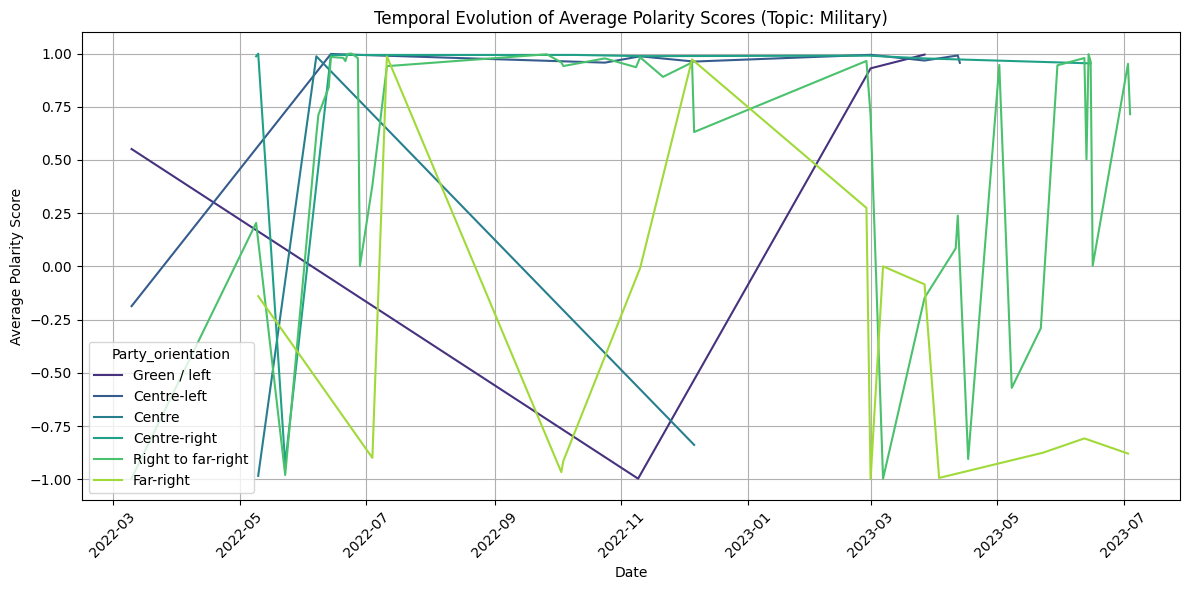

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you already have the DataFrame df_new with polarity scores

# Desired order of the categories
party_order = ['Green / left', 'Centre-left', 'Centre', 'Centre-right', 'Right to far-right', 'Far-right']

# Ensure 'Party_orientation' is a categorical type with the specified order
df_new['Party_orientation'] = pd.Categorical(df_new['Party_orientation'], categories=party_order, ordered=True)

# Sample data creation (for demonstration purposes)
# df_new = pd.read_csv('your_file.csv')  # Load your dataframe here

# Ensure the necessary columns exist
if 'Party_orientation' in df_new.columns and 'polarity' in df_new.columns and 'topic_primary_alt' in df_new.columns:
    # Step 1: Filter rows where 'topic_primary_alt' is 'Military' and 'Party_orientation' is not NaN
    filtered_df = df_new[(df_new['topic_primary_alt'] == 'Military') & (~df_new['Party_orientation'].isna())]

    # Step 2: Group by 'Party_orientation' and calculate the mean polarity for each orientation
    average_polarities_by_orientation = filtered_df.groupby('Party_orientation')['polarity'].mean().reset_index()

    # Step 3: Rename the columns for clarity
    average_polarities_by_orientation.columns = ['Party_orientation', 'average_polarity']

    # Step 4: Plotting
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Party_orientation', y='average_polarity', data=average_polarities_by_orientation, palette='viridis', order=party_order)
    plt.title('Average Polarity by Party Orientation (Topic: Military)')
    plt.xlabel('Party Orientation')
    plt.ylabel('Average Polarity')
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Show plot
    plt.show()
else:
    print("The 'Party_orientation', 'polarity', or 'topic_primary_alt' column is not present in the dataframe.")

# Assuming you already have the DataFrame df_new with polarity scores

# Filter rows where topic_primary_alt is 'Military'
df_education_expansion = df_new[df_new['topic_primary_alt'] == 'Military']

# Group by 'Date' and 'Party_orientation' and calculate mean polarity for each group
mean_polarity_by_orientation = df_education_expansion.groupby(['Date', 'Party_orientation'])['polarity'].mean().reset_index()

# Filter out entries with short 'Party_orientation' names if necessary
mean_polarity_by_orientation_filtered = mean_polarity_by_orientation[mean_polarity_by_orientation['Party_orientation'].str.len() >= 2]

# Ensure 'Party_orientation' is a categorical type with the specified order
mean_polarity_by_orientation_filtered['Party_orientation'] = pd.Categorical(mean_polarity_by_orientation_filtered['Party_orientation'], categories=party_order, ordered=True)

# Plotting the temporal evolution of average polarity scores for different political orientations
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='polarity', hue='Party_orientation', data=mean_polarity_by_orientation_filtered, palette='viridis', hue_order=party_order)
plt.title('Temporal Evolution of Average Polarity Scores (Topic: Military)')
plt.xlabel('Date')
plt.ylabel('Average Polarity Score')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()
